<a href="https://colab.research.google.com/github/Colsai/DATA-690-WANG/blob/master/Individual_Project/National_School_Expenditure_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [101]:
#Connect to Cloud Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# USA  National School Expenditure, Enrollment, Inflation and Progress Metrics 
![Image of Yaktocat](https://boardingschools.us/wp-content/uploads/2018/06/classroom-1.jpg)
## Introduction:
This notebook will focus on current educational allocation for K-12 students.  
**It will focus on three questions:**
- How much money is being spent on students currently?  
- What can be said about our funding of students?  
- And maybe, what can be said of their peformance?  

This notebook will look at trends in school funding and expenditures at a state level.  
Especially with the growing budgetary difficulties incurred by the 2019-2020 Coronavirus pandemic, where states are projecting significant declines in state revenues, it is important to think about to what effect this might have on schools.  
  
Maryland alone, for example, is projecting an 11-14% budgetary decline in FY 2021 (2), and with the increased difficulties of maintaining fair and equitable education through a virtual model, it is especially important to think about the potential negatives that students may face in terms of performance based on n/s/l revenue and budgetary shortfalls.
  
In a future look, I will look to expand this with more information and performance data (unfortunately, the data from the dataset that I used turned out to largely be too limited to make conjectures).

## A. Importing the Necessary Libraries to do the work and Getting Data
We'll use Pandas, Matplotlib, Seaborn, and Look to Stop Deprecation warnings* (took this out for now)

In [102]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [103]:
# Current Directory
os.getcwd()

'/content'

In [104]:
#This Zip file from the Kaggle included Multiple Files.
os.listdir("/content/drive/My Drive/archive/")

['EdStatsCountry.csv',
 'EdStatsCountry-Series.csv',
 'EdStatsSeries.csv',
 'EdStatsData.csv',
 'EdStatsFootNote.csv',
 'states_all_extended.csv',
 'states_all.csv',
 'input_data',
 'output_data',
 'sanity_checks',
 'states_all_extended.gsheet']

## B. We are getting the data from a zip of states education data
Source: https://www.kaggle.com/noriuk/us-education-datasets-unification-project

## What Is The Difference Bteween The Two State Education Spreadsheets?
- states_all_extended.csv has information on student performance, by race
- states_all.csv has more basic information, without race.

In [105]:
states_df = pd.read_csv("/content/drive/My Drive/archive/states_all.csv")

In [106]:
states_df.sample(3)

,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,SUPPORT_SERVICES_EXPENDITURE,OTHER_EXPENDITURE,CAPITAL_OUTLAY_EXPENDITURE,GRADES_PK_G,GRADES_KG_G,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
532,2002_MICHIGAN,MICHIGAN,2002,1724961.0,18055855.0,1254550.0,11203813.0,5597492.0,18881772.0,8402799.0,5841256.0,862090.0,2353031.0,24751.0,130891.0,131504.0,135649.0,110713.0,1065655.0,517152.0,1785160.0,NaN,NaN,219.0,265.0
372,1999_IOWA,IOWA,1999,498214.0,3740509.0,186056.0,1776000.0,1778453.0,3789049.0,1815795.0,1054419.0,245363.0,340182.0,5497.0,34596.0,36766.0,37966.0,37124.0,289970.0,155506.0,497301.0,NaN,NaN,NaN,NaN
486,2001_NEBRASKA,NEBRASKA,2001,285331.0,2355374.0,166068.0,806280.0,1383026.0,2344564.0,1256013.0,634842.0,100439.0,278832.0,5064.0,20234.0,21160.0,21757.0,21679.0,169355.0,90442.0,285095.0,NaN,NaN,NaN,NaN


In [107]:
states_extended_df = pd.read_csv("/content/drive/My Drive/archive/states_all_extended.csv")

In [108]:
states_extended_df.sample(3)

,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,SUPPORT_SERVICES_EXPENDITURE,OTHER_EXPENDITURE,CAPITAL_OUTLAY_EXPENDITURE,A_A_A,G01_A_A,G02_A_A,G03_A_A,G04_A_A,G05_A_A,G06_A_A,G07_A_A,G08_A_A,G09_A_A,G10_A_A,G11_A_A,G12_A_A,KG_A_A,PK_A_A,G01-G08_A_A,G09-G12_A_A,G01_AM_F,G01_AM_M,G01_AS_F,G01_AS_M,G01_BL_F,G01_BL_M,G01_HI_F,G01_HI_M,G01_HP_F,G01_HP_M,...,G04_A_A_READING,G04_A_A_MATHEMATICS,G04_A_M_READING,G04_A_M_MATHEMATICS,G04_A_F_READING,G04_A_F_MATHEMATICS,G04_WH_A_READING,G04_WH_A_MATHEMATICS,G04_BL_A_READING,G04_BL_A_MATHEMATICS,G04_HI_A_READING,G04_HI_A_MATHEMATICS,G04_AS_A_READING,G04_AS_A_MATHEMATICS,G04_AM_A_READING,G04_AM_A_MATHEMATICS,G04_HP_A_READING,G04_HP_A_MATHEMATICS,G04_TR_A_READING,G04_TR_A_MATHEMATICS,G08_A_A_READING,G08_A_A_MATHEMATICS,G08_A_M_READING,G08_A_M_MATHEMATICS,G08_A_F_READING,G08_A_F_MATHEMATICS,G08_WH_A_READING,G08_WH_A_MATHEMATICS,G08_BL_A_READING,G08_BL_A_MATHEMATICS,G08_HI_A_READING,G08_HI_A_MATHEMATICS,G08_AS_A_READING,G08_AS_A_MATHEMATICS,G08_AM_A_READING,G08_AM_A_MATHEMATICS,G08_HP_A_READING,G08_HP_A_MATHEMATICS,G08_TR_A_READING,G08_TR_A_MATHEMATICS
454,2000_VIRGINIA,VIRGINIA,2000,1132673.0,8911426.0,491873.0,3761983.0,4657570.0,9154676.0,4823780.0,2639328.0,347530.0,1011384.0,1144915.0,89072.0,89287.0,91217.0,92073.0,92300.0,91743.0,88338.0,87455.0,98371.0,86395.0,74045.0,70337.0,82585.0,7263.0,721485.0,329148.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,230.0,NaN,232.0,NaN,227.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,275.0,NaN,276.0,NaN,274.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
797,2007_NEW_YORK,NEW_YORK,2007,2754976.0,50762544.0,3269310.0,22845772.0,24647462.0,51253984.0,31465706.0,12638159.0,1318628.0,4216048.0,2765435.0,196537.0,196094.0,191144.0,191647.0,192009.0,195547.0,203146.0,205135.0,242566.0,229873.0,194223.0,185680.0,184672.0,48561.0,1571259.0,852342.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,224.0,243.0,220.0,244.0,227.0,242.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,264.0,280.0,258.0,281.0,269.0,280.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
858,2008_TENNESSEE,TENNESSEE,2008,966963.0,8086152.0,840919.0,3711646.0,3533587.0,8488521.0,4709467.0,2373319.0,451628.0,735501.0,971950.0,76493.0,75822.0,75499.0,75091.0,73438.0,71538.0,71393.0,72255.0,78675.0,74858.0,68562.0,65306.0,76156.0,16864.0,591529.0,287401.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


For this project, I will focus on the smaller states_all.csv file, since there is a considerable amount of data missing from the extended file.

### B2. Head/ Tail/ Sample of states_all.csv df
Let's take a glance at what data the states_all.csv file has:

In [109]:
#We know that data starts at at least 1992, assuming that it is correctly ordered
states_df.head(5)

,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,SUPPORT_SERVICES_EXPENDITURE,OTHER_EXPENDITURE,CAPITAL_OUTLAY_EXPENDITURE,GRADES_PK_G,GRADES_KG_G,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
0,1992_ALABAMA,ALABAMA,1992,NaN,2678885.0,304177.0,1659028.0,715680.0,2653798.0,1481703.0,735036.0,NaN,174053.0,8224.0,55460.0,57948.0,58025.0,41167.0,NaN,NaN,731634.0,208.0,252.0,207.0,NaN
1,1992_ALASKA,ALASKA,1992,NaN,1049591.0,106780.0,720711.0,222100.0,972488.0,498362.0,350902.0,NaN,37451.0,2371.0,10152.0,9748.0,8789.0,6714.0,NaN,NaN,122487.0,NaN,NaN,NaN,NaN
2,1992_ARIZONA,ARIZONA,1992,NaN,3258079.0,297888.0,1369815.0,1590376.0,3401580.0,1435908.0,1007732.0,NaN,609114.0,2544.0,53497.0,55433.0,49081.0,37410.0,NaN,NaN,673477.0,215.0,265.0,209.0,NaN
3,1992_ARKANSAS,ARKANSAS,1992,NaN,1711959.0,178571.0,958785.0,574603.0,1743022.0,964323.0,483488.0,NaN,145212.0,808.0,33511.0,34632.0,36011.0,27651.0,NaN,NaN,441490.0,210.0,256.0,211.0,NaN
4,1992_CALIFORNIA,CALIFORNIA,1992,NaN,26260025.0,2072470.0,16546514.0,7641041.0,27138832.0,14358922.0,8520926.0,NaN,2044688.0,59067.0,431763.0,418418.0,363296.0,270675.0,NaN,NaN,5254844.0,208.0,261.0,202.0,NaN


In [110]:
#We know that the the data contains information until at least 2019- hard to know yet if it is ordered
states_df.tail(5)

,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,SUPPORT_SERVICES_EXPENDITURE,OTHER_EXPENDITURE,CAPITAL_OUTLAY_EXPENDITURE,GRADES_PK_G,GRADES_KG_G,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
1710,2019_VIRGINIA,VIRGINIA,2019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,247.0,287.0,224.0,262.0
1711,2019_WASHINGTON,WASHINGTON,2019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,240.0,286.0,220.0,266.0
1712,2019_WEST_VIRGINIA,WEST_VIRGINIA,2019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,231.0,272.0,213.0,256.0
1713,2019_WISCONSIN,WISCONSIN,2019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,242.0,289.0,220.0,267.0
1714,2019_WYOMING,WYOMING,2019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,246.0,286.0,227.0,265.0


In [111]:
#There are a considerable about of missing values from some of the schools and systems- hopefully this isn't an issue later.
states_df.sample(5)

,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,SUPPORT_SERVICES_EXPENDITURE,OTHER_EXPENDITURE,CAPITAL_OUTLAY_EXPENDITURE,GRADES_PK_G,GRADES_KG_G,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
1152,2014_NEW_JERSEY,NEW_JERSEY,2014,1335350.0,28454548.0,1142878.0,11047025.0,16264645.0,27742203.0,14956606.0,9205196.0,1273398.0,895858.0,55106.0,92560.0,97428.0,99751.0,95666.0,792613.0,401874.0,1400579.0,NaN,NaN,NaN,NaN
1094,2013_MINNESOTA,MINNESOTA,2013,802454.0,10848720.0,646542.0,6792440.0,3409738.0,10942019.0,5826404.0,2652321.0,850969.0,1016760.0,14556.0,65618.0,63979.0,62899.0,69090.0,509390.0,261409.0,850973.0,253.0,295.0,227.0,271.0
1377,1990_INDIANA,INDIANA,1990,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,967.0,68024.0,74634.0,73258.0,62740.0,NaN,NaN,954525.0,NaN,267.0,NaN,NaN
1041,2012_MASSACHUSETTS,MASSACHUSETTS,2012,922683.0,15763456.0,979175.0,6200945.0,8583336.0,15696061.0,8801567.0,4642633.0,467588.0,1159931.0,28245.0,69669.0,70952.0,72048.0,67856.0,568277.0,287506.0,954773.0,NaN,NaN,NaN,NaN
91,1993_SOUTH_CAROLINA,SOUTH_CAROLINA,1993,631613.0,3031112.0,277419.0,1419961.0,1333732.0,2994038.0,1592384.0,820795.0,269661.0,221824.0,7244.0,45490.0,50357.0,50591.0,33949.0,NaN,NaN,643696.0,NaN,NaN,NaN,NaN


Looking at the head/ tail/ sample data, let's think about what to do with the missing values, since there are a considerable number here. 

### B3. Should we try to remove null values?
Let's test whether or not it is a good idea to remove the null values here.

In [112]:
#Check for whether or not the values are not null
states_df[states_df.notnull()]

,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,SUPPORT_SERVICES_EXPENDITURE,OTHER_EXPENDITURE,CAPITAL_OUTLAY_EXPENDITURE,GRADES_PK_G,GRADES_KG_G,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
0,1992_ALABAMA,ALABAMA,1992,NaN,2678885.0,304177.0,1659028.0,715680.0,2653798.0,1481703.0,735036.0,NaN,174053.0,8224.0,55460.0,57948.0,58025.0,41167.0,NaN,NaN,731634.0,208.0,252.0,207.0,NaN
1,1992_ALASKA,ALASKA,1992,NaN,1049591.0,106780.0,720711.0,222100.0,972488.0,498362.0,350902.0,NaN,37451.0,2371.0,10152.0,9748.0,8789.0,6714.0,NaN,NaN,122487.0,NaN,NaN,NaN,NaN
2,1992_ARIZONA,ARIZONA,1992,NaN,3258079.0,297888.0,1369815.0,1590376.0,3401580.0,1435908.0,1007732.0,NaN,609114.0,2544.0,53497.0,55433.0,49081.0,37410.0,NaN,NaN,673477.0,215.0,265.0,209.0,NaN
3,1992_ARKANSAS,ARKANSAS,1992,NaN,1711959.0,178571.0,958785.0,574603.0,1743022.0,964323.0,483488.0,NaN,145212.0,808.0,33511.0,34632.0,36011.0,27651.0,NaN,NaN,441490.0,210.0,256.0,211.0,NaN
4,1992_CALIFORNIA,CALIFORNIA,1992,NaN,26260025.0,2072470.0,16546514.0,7641041.0,27138832.0,14358922.0,8520926.0,NaN,2044688.0,59067.0,431763.0,418418.0,363296.0,270675.0,NaN,NaN,5254844.0,208.0,261.0,202.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1710,2019_VIRGINIA,VIRGINIA,2019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,247.0,287.0,224.0,262.0
1711,2019_WASHINGTON,WASHINGTON,2019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,240.0,286.0,220.0,266.0
1712,2019_WEST_VIRGINIA,WEST_VIRGINIA,2019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,231.0,272.0,213.0,256.0
1713,2019_WISCONSIN,WISCONSIN,2019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,242.0,289.0,220.0,267.0


In [113]:
#How many null values are there?
states_df.isnull().sum()

PRIMARY_KEY                        0
STATE                              0
YEAR                               0
ENROLL                           491
TOTAL_REVENUE                    440
FEDERAL_REVENUE                  440
STATE_REVENUE                    440
LOCAL_REVENUE                    440
TOTAL_EXPENDITURE                440
INSTRUCTION_EXPENDITURE          440
SUPPORT_SERVICES_EXPENDITURE     440
OTHER_EXPENDITURE                491
CAPITAL_OUTLAY_EXPENDITURE       440
GRADES_PK_G                      173
GRADES_KG_G                       83
GRADES_4_G                        83
GRADES_8_G                        83
GRADES_12_G                       83
GRADES_1_8_G                     695
GRADES_9_12_G                    644
GRADES_ALL_G                      83
AVG_MATH_4_SCORE                1150
AVG_MATH_8_SCORE                1113
AVG_READING_4_SCORE             1065
AVG_READING_8_SCORE             1153
dtype: int64

So, there are a lot. Unfortunately, a lot of the missing data comes from the math and reading scores. 

In [114]:
#Let's just try to drop the null values and see what happens...
states_df2 = states_df.dropna()
states_df2.shape

(355, 25)

In [115]:
#Let's see how many rows we would lose if we did drop.na
np.subtract((states_df.shape), (states_df2.shape))

array([1360,    0])

So, we would lose 1360 rows were we to drop the null values.  
Deleting all missing values seems to create some issues.  
In particular, NAEP scores appear to only happen every two years.  
This doesn't seem like a good decision to be able to do data analysis with, so I will just stick with the original states_df.

## C. Adding in one more column for later.
The last thing I will add is a simple insertion of the total expenditure spent on each student divided by the number of students (enrollment). This should give a good way to see how much is spent per student in each state.

In [116]:
#I'll insert one small column in here- Total Expenditure Per Student
states_df.insert(10, "EXPENDITURE_PER_STUDENT", states_df["TOTAL_EXPENDITURE"]/states_df["ENROLL"])

In [117]:
states_df.head()

,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,EXPENDITURE_PER_STUDENT,SUPPORT_SERVICES_EXPENDITURE,OTHER_EXPENDITURE,CAPITAL_OUTLAY_EXPENDITURE,GRADES_PK_G,GRADES_KG_G,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
0,1992_ALABAMA,ALABAMA,1992,NaN,2678885.0,304177.0,1659028.0,715680.0,2653798.0,1481703.0,NaN,735036.0,NaN,174053.0,8224.0,55460.0,57948.0,58025.0,41167.0,NaN,NaN,731634.0,208.0,252.0,207.0,NaN
1,1992_ALASKA,ALASKA,1992,NaN,1049591.0,106780.0,720711.0,222100.0,972488.0,498362.0,NaN,350902.0,NaN,37451.0,2371.0,10152.0,9748.0,8789.0,6714.0,NaN,NaN,122487.0,NaN,NaN,NaN,NaN
2,1992_ARIZONA,ARIZONA,1992,NaN,3258079.0,297888.0,1369815.0,1590376.0,3401580.0,1435908.0,NaN,1007732.0,NaN,609114.0,2544.0,53497.0,55433.0,49081.0,37410.0,NaN,NaN,673477.0,215.0,265.0,209.0,NaN
3,1992_ARKANSAS,ARKANSAS,1992,NaN,1711959.0,178571.0,958785.0,574603.0,1743022.0,964323.0,NaN,483488.0,NaN,145212.0,808.0,33511.0,34632.0,36011.0,27651.0,NaN,NaN,441490.0,210.0,256.0,211.0,NaN
4,1992_CALIFORNIA,CALIFORNIA,1992,NaN,26260025.0,2072470.0,16546514.0,7641041.0,27138832.0,14358922.0,NaN,8520926.0,NaN,2044688.0,59067.0,431763.0,418418.0,363296.0,270675.0,NaN,NaN,5254844.0,208.0,261.0,202.0,NaN


In [118]:
#Looking at aggregating by state-
states_df_agg =states_df.groupby('STATE').agg(['mean'])

In [119]:
#Let's see 
states_df_agg.sample(10)

,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,EXPENDITURE_PER_STUDENT,SUPPORT_SERVICES_EXPENDITURE,OTHER_EXPENDITURE,CAPITAL_OUTLAY_EXPENDITURE,GRADES_PK_G,GRADES_KG_G,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
STATE,,,,,,,,,,,,,,,,,,,,,,,,
WASHINGTON,2002.030303,1.010687e+06,9295918.12,752469.48,5764736.68,2778711.96,9481863.84,4624236.92,9.461723,2809570.56,4.154238e+05,1282112.24,8459.250000,72424.25000,75210.43750,74138.21875,70990.21875,625748.60,3.246117e+05,9.789468e+05,242.333333,286.666667,221.583333,267.090909
FLORIDA,2002.030303,2.486441e+06,20865131.36,2142990.24,8757322.96,9964818.16,21287605.24,10426097.52,8.581060,6253747.40,1.351972e+06,2751736.96,44426.218750,182486.18750,182185.46875,179623.31250,138701.25000,1596504.30,7.655904e+05,2.376420e+06,238.800000,273.454545,219.384615,261.272727
CONNECTICUT,2002.030303,5.231307e+05,7482379.56,345952.88,2753584.76,4382841.92,7197858.72,4051110.08,13.992111,2135429.72,2.601469e+05,450380.76,11269.156250,40360.65625,40364.96875,39505.28125,35202.09375,338176.00,1.660530e+05,5.326665e+05,239.909091,282.250000,227.000000,270.181818
WEST_VIRGINIA,2002.030303,2.891283e+05,2664419.00,287330.80,1564013.72,813074.48,2670432.28,1470191.08,9.479360,825450.64,1.760134e+05,185668.60,7927.031250,21715.81250,21735.93750,22799.65625,20056.43750,168134.40,8.321148e+04,2.970217e+05,231.181818,268.666667,215.615385,258.090909
NEW_JERSEY,2002.030303,1.262230e+06,20129735.60,858881.76,7848969.24,11421884.60,20051592.24,10600125.56,15.818014,6548690.24,7.719090e+05,1217838.56,24426.218750,89876.53125,93358.56250,91086.59375,82546.21875,792867.40,3.814049e+05,1.284902e+06,244.000000,286.909091,227.181818,271.888889
MICHIGAN,2002.030303,1.594491e+06,16877091.20,1330397.08,9318244.92,6228449.20,17026245.84,8097297.48,10.942132,5433000.84,8.149460e+05,1431390.60,23236.531250,127379.56250,119480.62500,120535.09375,106970.90625,976290.45,4.995887e+05,1.637926e+06,234.363636,276.166667,217.833333,263.500000
SOUTH_DAKOTA,2002.030303,1.269699e+05,1003774.08,143773.56,320141.48,539859.04,1014543.96,518695.56,8.112235,297434.88,4.758196e+04,123644.28,1560.468750,10513.15625,9956.62500,9918.78125,8908.15625,77311.05,3.898752e+04,1.308904e+05,240.777778,287.444444,221.222222,268.111111
NEW_YORK,2002.030303,2.748181e+06,42385624.88,2593569.68,17871100.24,21920954.96,44201162.80,27063674.24,16.532337,10875720.96,1.226114e+06,3685817.28,40456.406250,195563.28125,199271.81250,197167.21875,166942.96875,1636549.80,8.211848e+05,2.752745e+06,235.363636,277.083333,220.615385,264.363636


Text(0, 0.5, 'Total Enrollment')

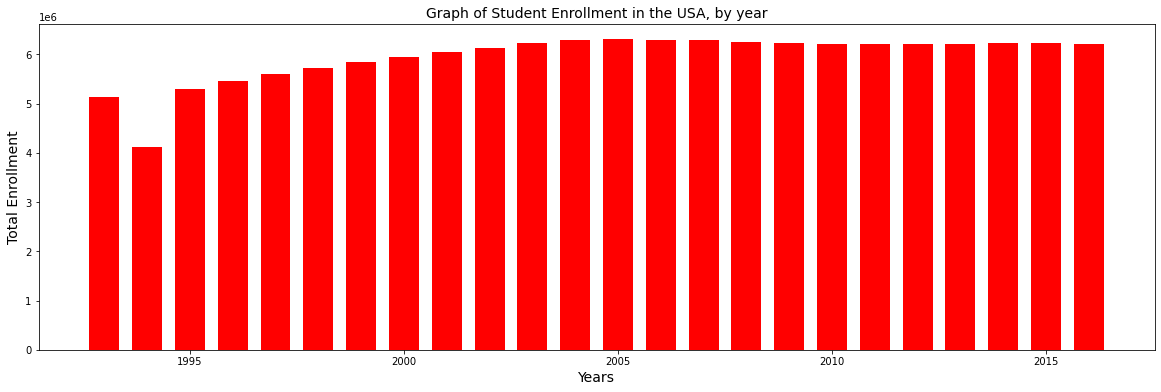

In [120]:
#Showing Progression of funding over years (USA), enrollment
year = states_df['YEAR']
enroll = states_df['ENROLL']

fig, ax = plt.subplots(figsize = (20,6))

ax.bar(year, enroll, width=.7, align='center',color='red')

ax.set_title("Graph of Student Enrollment in the USA, by year", color='black', size = 14)
ax.set_xlabel("Years", color='black', size = 14)
ax.set_ylabel("Total Enrollment", color='black', size = 14)

**Analysis:** Overall, enrollment appears to have stabilized, and not really gone up or changed that much since 2004. There is an uptrend from 1990-2000 (and a weird drop in 1994... was there data missing?) but after 2000, from the graph there does not appear to be much change at all. 

Text(0, 0.5, 'Total Enrollment')

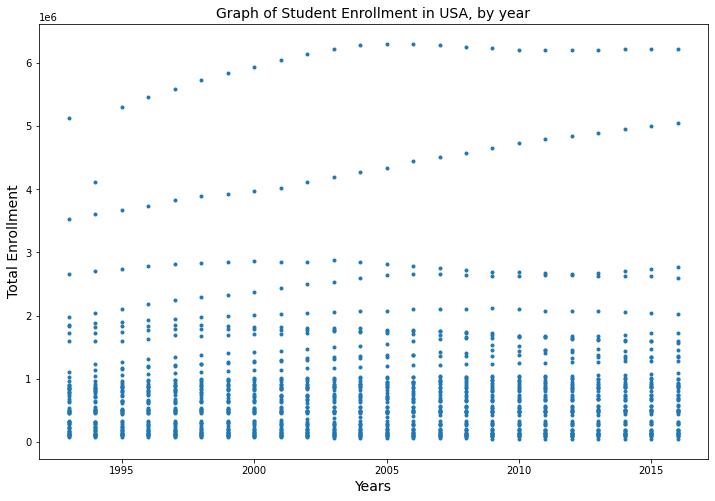

In [121]:
#Showing Progression of funding over years (USA), enrollment
year = states_df['YEAR']
enroll = states_df['ENROLL']

fig, ax = plt.subplots(figsize = (12,8))

ax.scatter(year, enroll, marker = ".")

ax.set_yscale("linear")

ax.set_title("Graph of Student Enrollment in USA, by year", color='black', size = 14)
ax.set_xlabel("Years", color='black', size = 14)
ax.set_ylabel("Total Enrollment", color='black', size = 14)

**Analysis**: Not a great graph, but it looks like there are some states taht have a much larger enrollment than other states. Many of the states have very small enrollments, but a few others have much larger enrollments.

Let's take a quick look at total revenue and total expenditure on schools in all states, as bar graphs. They will be plotted at the same time.

Text(0, 0.5, 'Total Expenditure Per Student')

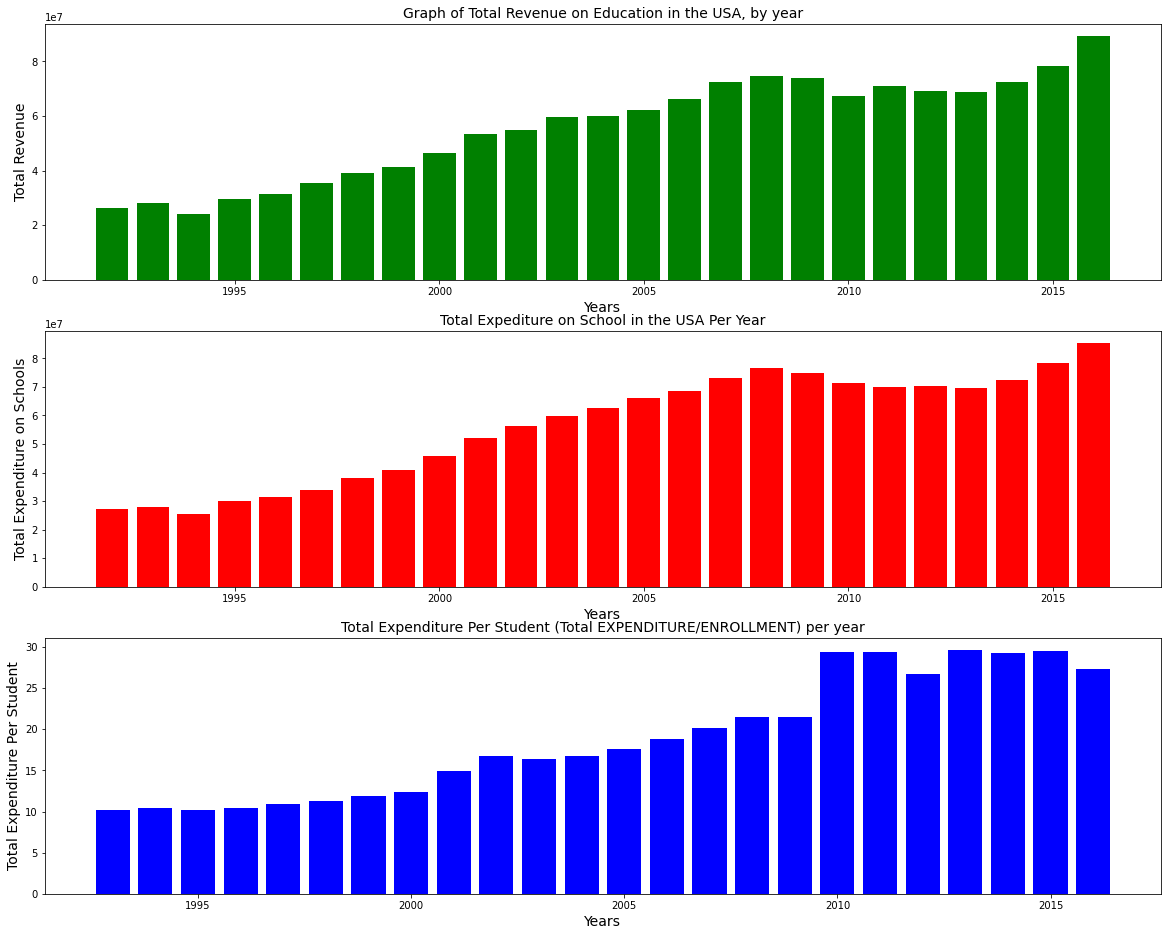

In [122]:
#Showing Progression of funding over years (USA), enrollment
year = states_df['YEAR']
revenue = states_df['TOTAL_REVENUE']
total_exp = states_df['TOTAL_EXPENDITURE']
exp_per_stu = states_df['EXPENDITURE_PER_STUDENT']

fig, ax = plt.subplots(3, figsize = (20,16))

ax[0].bar(year, revenue, color = "green")

ax[0].set_title("Graph of Total Revenue on Education in the USA, by year", color='black', size = 14)
ax[0].set_xlabel("Years", color='black', size = 14)
ax[0].set_ylabel("Total Revenue", color='black', size = 14)

ax[1].bar(year, total_exp, color = "red")

ax[1].set_title("Total Expediture on School in the USA Per Year", color='black', size = 14)
ax[1].set_xlabel("Years", color='black', size = 14)
ax[1].set_ylabel("Total Expenditure on Schools", color='black', size = 14)

ax[2].bar(year, exp_per_stu, color = "blue")

ax[2].set_title("Total Expenditure Per Student (Total EXPENDITURE/ENROLLMENT) per year", color='black', size = 14)
ax[2].set_xlabel("Years", color='black', size = 14)
ax[2].set_ylabel("Total Expenditure Per Student", color='black', size = 14)

**Analysis:** It appears as if revenue, total expenditure, and expenditure per student are all *mostly* increasing per year, with some small exceptions.
Let's see if we can get anything from the student performance data:

In [171]:
states_df_agg.columns

MultiIndex([(                        'YEAR', 'mean'),
            (                      'ENROLL', 'mean'),
            (               'TOTAL_REVENUE', 'mean'),
            (             'FEDERAL_REVENUE', 'mean'),
            (               'STATE_REVENUE', 'mean'),
            (               'LOCAL_REVENUE', 'mean'),
            (           'TOTAL_EXPENDITURE', 'mean'),
            (     'INSTRUCTION_EXPENDITURE', 'mean'),
            (     'EXPENDITURE_PER_STUDENT', 'mean'),
            ('SUPPORT_SERVICES_EXPENDITURE', 'mean'),
            (           'OTHER_EXPENDITURE', 'mean'),
            (  'CAPITAL_OUTLAY_EXPENDITURE', 'mean'),
            (                 'GRADES_PK_G', 'mean'),
            (                 'GRADES_KG_G', 'mean'),
            (                  'GRADES_4_G', 'mean'),
            (                  'GRADES_8_G', 'mean'),
            (                 'GRADES_12_G', 'mean'),
            (                'GRADES_1_8_G', 'mean'),
            (               

Text(0, 0.5, 'Total Student Performance (average reading and math)')

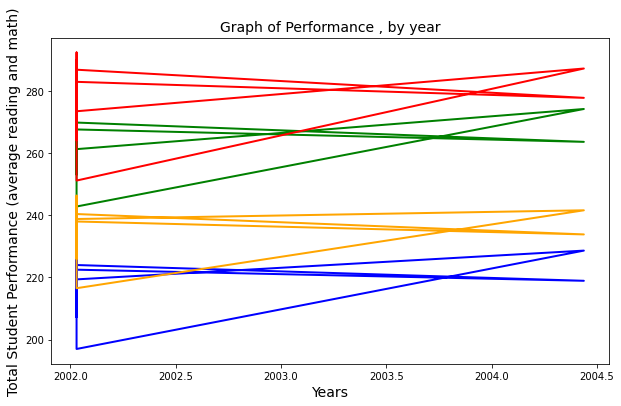

In [172]:
#Showing Progression of funding over years
x = states_df_agg['YEAR']
avg_8_r8 = states_df_agg['AVG_READING_8_SCORE']
avg_8_m8 = states_df_agg['AVG_MATH_8_SCORE']
avg_8_r4 = states_df_agg['AVG_READING_4_SCORE']
avg_8_m4 = states_df_agg['AVG_MATH_4_SCORE']

fig, ax = plt.subplots(figsize = (10,6))

ax.plot(x, avg_8_r8, 'green', linewidth=2, markersize= 12)
ax.plot(x, avg_8_m8, 'red', linewidth=2, markersize= 12)
ax.plot(x, avg_8_r4, 'blue', linewidth=2, markersize= 12)
ax.plot(x, avg_8_m4, 'orange', linewidth=2, markersize= 12)

plt.xscale('linear')

ax.set_title("Graph of Performance , by year", color='black', size = 14)
ax.set_xlabel("Years", color='black', size = 14)
ax.set_ylabel("Total Student Performance (average reading and math)", color='black', size = 14)

Looking through the graphs and missing data, unfortunately, the dataset in question did not have enough performance data. So, the focus of the ladder part of this notebook will be expenditure, enrollment, and cost, so that we can come back and merge this notebook with better student performance data in the future. 

## D. Let's Look Specifically at Trends in Certain States
Instead of looking at the US as a whole, lets take a look at specifically some local states, such as Maryland, Virginia, and Delaware. (DelMarVa) states.


Let's focus on three key enrollment and expenditure questions before exploring the educational outcomes:  
- How has Maryland Student Enrollment changed over time, both in total and in rate of change?
- How has total expenditure increased over time, in rate of change?
- How has expenditure per student changed, in rate of change?
- How has expenditure per student changed in comparison to inflation?


### Note: Let's make a small function here to return states data, so that we can search for states as we go.
This function takes a dataframe, column, and name, and returns matches for all of the states where there is a match. 

In [123]:
#Small function to return states
def state_finder(dataframe, column, name, exact=True):
    if exact == True:
        find_it = dataframe[dataframe[column].str.match(name, case=False)] #Rewrote with match instead of contains to prevent west virginia/virginia

    else:
        find_it = dataframe[dataframe[column].str.contains(name, case=False)] #Rewrote with match instead of contains to prevent west virginia/virginia
    return find_it

In [124]:
# Let's try it on Maryland, here
md_df = state_finder(states_df, "STATE", "maryland", False)

In [125]:
# Finally, let's see the head and sample of the data
md_df.head(5)

,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,EXPENDITURE_PER_STUDENT,SUPPORT_SERVICES_EXPENDITURE,OTHER_EXPENDITURE,CAPITAL_OUTLAY_EXPENDITURE,GRADES_PK_G,GRADES_KG_G,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
20,1992_MARYLAND,MARYLAND,1992,NaN,4658498.0,228336.0,1778834.0,2651328.0,4698374.0,2628891.0,NaN,1461083.0,NaN,340298.0,16081.0,59641.0,60287.0,52815.0,40426.0,NaN,NaN,751850.0,217.0,265.0,211.0,NaN
71,1993_MARYLAND,MARYLAND,1993,751850.0,4918010.0,252211.0,1940713.0,2725086.0,4898895.0,2785206.0,6.515788,1508203.0,224147.0,324925.0,17984.0,60378.0,61199.0,55285.0,40661.0,NaN,NaN,772638.0,NaN,NaN,NaN,NaN
122,1994_MARYLAND,MARYLAND,1994,772638.0,5141505.0,258611.0,2002382.0,2880512.0,5187683.0,2812922.0,6.714248,1673254.0,254041.0,387699.0,18834.0,62341.0,61982.0,57222.0,43223.0,NaN,NaN,790938.0,NaN,NaN,210.0,NaN
173,1995_MARYLAND,MARYLAND,1995,790938.0,5580123.0,270249.0,2059219.0,3250655.0,5610071.0,3064702.0,7.092934,1768323.0,253194.0,458731.0,19092.0,63232.0,62207.0,58835.0,42974.0,NaN,NaN,805544.0,NaN,NaN,NaN,NaN
224,1996_MARYLAND,MARYLAND,1996,805544.0,5688918.0,271806.0,2163187.0,3253925.0,5825606.0,3197895.0,7.231890,1856055.0,251330.0,449601.0,19639.0,61856.0,63693.0,59236.0,44232.0,NaN,NaN,818583.0,NaN,NaN,NaN,NaN


### Note: Nan Values Removed?
We find a lot of NaN and missing values from 1980s years, however there is still some data in there (they are not all NaN). We'll keep it for now in case we need the enrollment data for each grade later.

### Da. Small Graphs to see what is going on with enrollment and expenditure:
Let's just create an easy graph for looking at basic trends. We will find:

Text(0, 0.5, 'Enrollment')

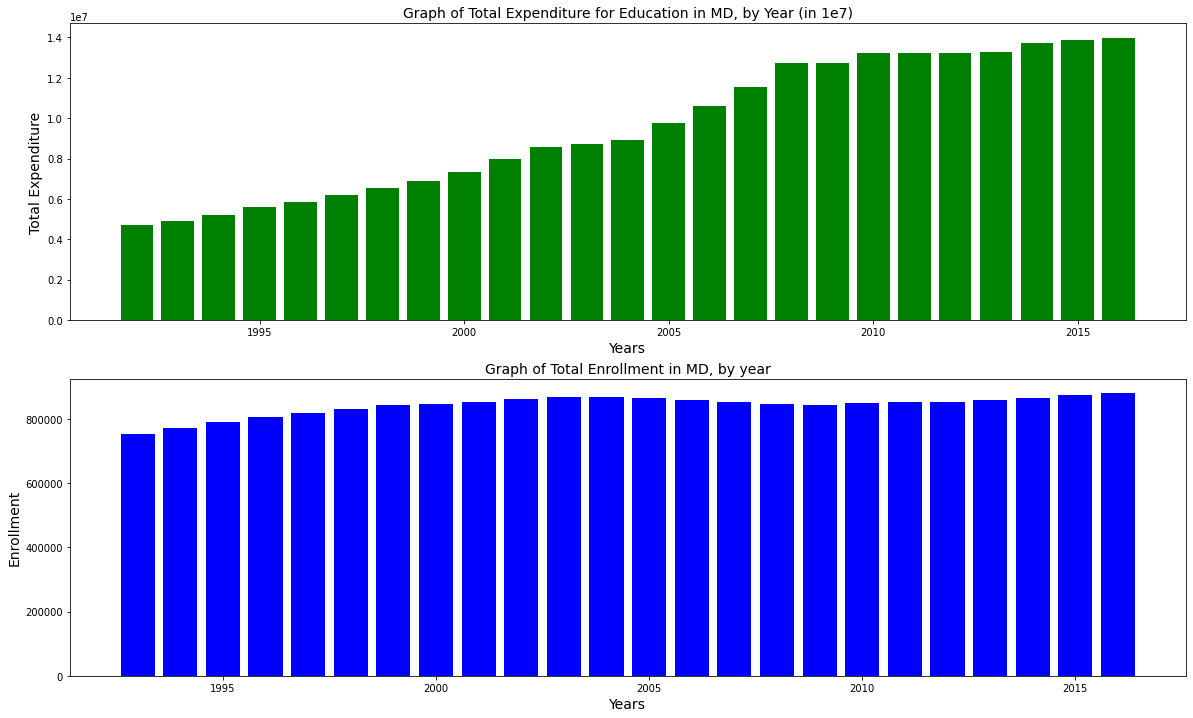

In [126]:
# Decreasing rate of expenditure over time
year = md_df['YEAR']
enroll = md_df['ENROLL']
expenditure = md_df['TOTAL_EXPENDITURE']

fig, ax = plt.subplots(2, figsize = (20,12))

ax[0].bar(year, expenditure, color = "green")
ax[0].set_title("Graph of Total Expenditure for Education in MD, by Year (in 1e7)", color='black', size = 14)
ax[0].set_xlabel("Years", color='black', size = 14)
ax[0].set_ylabel("Total Expenditure", color='black', size = 14)

# Decreasing rate of expenditure over time
ax[1].bar(year, enroll, color = "blue")
ax[1].set_title("Graph of Total Enrollment in MD, by year", color='black', size = 14)
ax[1].set_xlabel("Years", color='black', size = 14)
ax[1].set_ylabel("Enrollment", color='black', size = 14)

**Analysis:**  
**Total Expenditure:** Total expenditure has increased per year since the beginning of 1990. However, it has seemingly capped out, with similar values between 2010 and 206.  
**Enrollment:** Enrollment has been pretty stable, somewhere between 700-800k students per year since the early 1990s. 

## E. Exploring rate of change for Enrollment and Total Expenditure
Let's explore some of the changes in Maryland's Enrollment and Total Expenditure for the State. Later, we can do comparisons for whether other states may be spending more than Maryland is.

In the next step, we will use a function that checks and makes a list based on percent changes over time. 

In [127]:
#This is a simple function that returns items based on their change over time. 
def percent_change(input_list, rounded_val=2):
    percent_list = []

    for this_year in input_list:
        try:
              pct_increase = ((this_year - last_year) / last_year) * 100
        except:
              pct_increase = 0

        percent_list.append(round(pct_increase,2))
        last_year = this_year

    percent_list = [round(i, rounded_val) for i in percent_list] #This function combines rounding inside of it, since percents are easier to use

    return percent_list

In [128]:
# Let's start by making md_df a list, so that we can throw it into the function.
md_enroll = md_df['ENROLL'].to_list()
print(md_enroll)

[nan, 751850.0, 772638.0, 790938.0, 805544.0, 818583.0, 830744.0, 841671.0, 846582.0, 852920.0, 860640.0, 866743.0, 869113.0, 865561.0, 860021.0, 851640.0, 845700.0, 843781.0, 848252.0, 851971.0, 853778.0, 859252.0, 865768.0, 874108.0, 879196.0, nan, nan, nan, nan, nan, nan, nan, nan]


In [129]:
#Now we can run the percent change function on the Maryland enrollment data
md_total_enr = percent_change(md_enroll)

In [130]:
#And finally, insert it back into the dataframe as a new column "Enrollment Percent Change"
md_df.insert(3, "Enrollment Percent Change", md_total_enr)

In [131]:
#Let's double check to see if it worked 
md_df.sample(5)

,PRIMARY_KEY,STATE,YEAR,Enrollment Percent Change,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,EXPENDITURE_PER_STUDENT,SUPPORT_SERVICES_EXPENDITURE,OTHER_EXPENDITURE,CAPITAL_OUTLAY_EXPENDITURE,GRADES_PK_G,GRADES_KG_G,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
1415,1986_MARYLAND,MARYLAND,1986,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9361.0,50505.0,48378.0,47315.0,47584.0,NaN,NaN,675747.0,NaN,NaN,NaN,NaN
683,2005_MARYLAND,MARYLAND,2005,-0.41,865561.0,9906219.0,670998.0,3729262.0,5505959.0,9782665.0,5154440.0,11.302109,2934277.0,407619.0,947970.0,24219.0,56858.0,62347.0,68400.0,58766.0,507494.0,271449.0,860020.0,238.0,278.0,220.0,261.0
326,1998_MARYLAND,MARYLAND,1998,1.49,830744.0,6521269.0,325321.0,2514101.0,3681847.0,6519389.0,3584678.0,7.847651,1902782.0,302974.0,558202.0,20013.0,57813.0,67230.0,62174.0,49321.0,525146.0,231534.0,841671.0,NaN,NaN,212.0,261.0
1419,1990_MARYLAND,MARYLAND,1990,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14360.0,56617.0,57228.0,49864.0,40529.0,NaN,NaN,715176.0,NaN,261.0,NaN,NaN
173,1995_MARYLAND,MARYLAND,1995,2.37,790938.0,5580123.0,270249.0,2059219.0,3250655.0,5610071.0,3064702.0,7.092934,1768323.0,253194.0,458731.0,19092.0,63232.0,62207.0,58835.0,42974.0,NaN,NaN,805544.0,NaN,NaN,NaN,NaN


It worked, but there are some null values, mostly before 1990. Let's see if it is usable by graphing it.

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


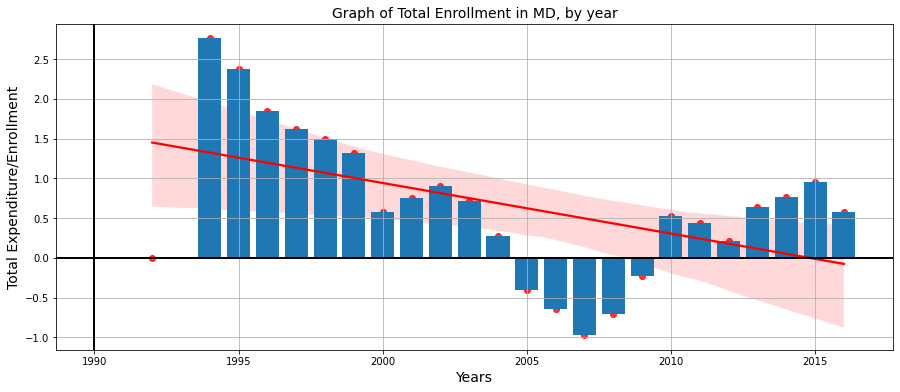

In [132]:
# Rate of change- MD enrollment percent change
year = md_df['YEAR']
enroll = md_df['Enrollment Percent Change']

fig, ax = plt.subplots(figsize = (15,6))

ax.bar(year, enroll)
sns.regplot(year, enroll, color = 'red')

ax.set_title("Graph of Total Enrollment in MD, by year", color='black', size = 14)
ax.set_xlabel("Years", color='black', size = 14)
ax.set_ylabel("Total Expenditure/Enrollment", color='black', size = 14)
ax.grid()
ax.axhline(y=0, color = "black",linewidth=2)
ax.axvline(x=1990, color = "black",linewidth=2)

**Analysis**: We see here that the MD rate of enrollment has slowed, although it is still above 0. From 2005 to 2009, there was actually a negative enrollment change, per year. However, it stabilized and increased to above 0 after 2010.

## F. What about for Maryland Total Expenditure? 
We might expect a slowing rate in expenditures, with enrollment dropping.  
Same process, we will make a list, run the list into the function, return the list, and then add the list back into the df. 

In [133]:
#Let's take the md_df Total Expenditure as our focus here. 
md_total_expenditure = md_df['TOTAL_EXPENDITURE'].to_list()
print(md_total_expenditure)

[4698374.0, 4898895.0, 5187683.0, 5610071.0, 5825606.0, 6217120.0, 6519389.0, 6892276.0, 7355698.0, 7981362.0, 8568446.0, 8732518.0, 8921938.0, 9782665.0, 10585292.0, 11541225.0, 12739693.0, 12757599.0, 13205691.0, 13247697.0, 13212140.0, 13284637.0, 13712839.0, 13882823.0, 13992191.0, nan, nan, nan, nan, nan, nan, nan, nan]


In [134]:
#Make a new list as md_total_exp_change
md_total_exp_chg = percent_change(md_total_expenditure)

In [135]:
#Re-insert the list as a column back into the dataframe
md_df.insert(9, "Total Expenditure Percent Change", md_total_exp_chg)

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, 'Total Expenditure/Enrollment')

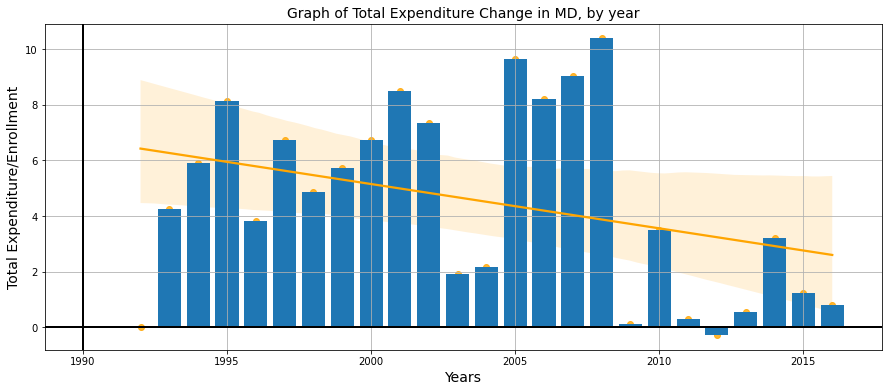

In [136]:
# Decreasing rate of expenditure over time
year = md_df['YEAR']
enroll = md_df['Enrollment Percent Change']
total_exp = md_df['Total Expenditure Percent Change']

fig, ax = plt.subplots(figsize = (15,6))

ax.bar(year, total_exp)
sns.regplot(year, total_exp, color = 'orange')

ax.set_title("Graph of Total Expenditure Change in MD, by year", color='black', size = 14)
ax.axhline(y=0, color = "black",linewidth=2)
ax.axvline(x=1990, color = "black",linewidth=2)
ax.grid()
ax.set_xlabel("Years", color='black', size = 14)
ax.set_ylabel("Total Expenditure/Enrollment", color='black', size = 14)

**Analysis**: We see a somewhat-declining percentage increase in the rate of expenditure change, so the state has slowly spent less and less over time, per student.  
Interestingly, we also see that Maryland both had great variance in some years- 2008 to 2009 was 10% to almost 0%.
Let's compare enrollment to expenditure in the next graph:

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


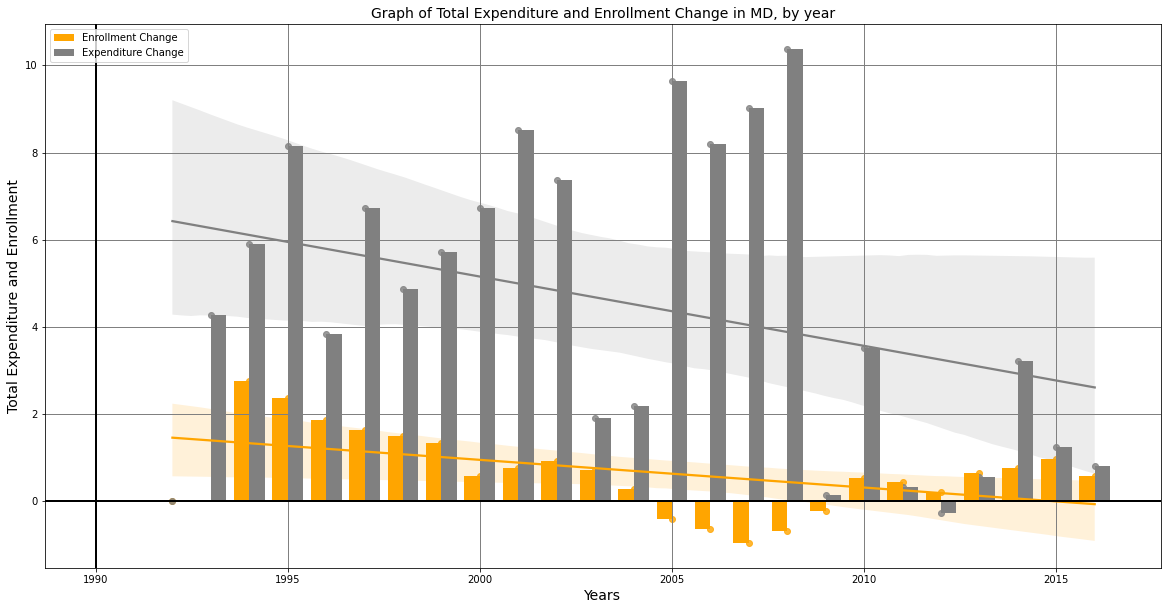

In [137]:
# Let's Compare the Two Here:
year = md_df['YEAR']
enroll = md_df['Enrollment Percent Change']
total_exp = md_df['Total Expenditure Percent Change']

fig, ax = plt.subplots(figsize = (20,10))

ax.bar(year-.2, enroll, width=.4, color = 'orange', label = 'Enrollment Change') 
ax.bar(year+.2, total_exp, width=.4, color = 'gray', label = 'Expenditure Change')

sns.regplot(year, enroll, color = 'orange')
sns.regplot(year, total_exp, color = 'gray')

plt.legend(loc="upper left")

ax.grid(color='gray',which='major', linestyle='-', linewidth=1)

ax.set_title("Graph of Total Expenditure and Enrollment Change in MD, by year", color='black', size = 14)
ax.set_xlabel("Years", color='black', size = 14)
ax.set_ylabel("Total Expenditure and Enrollment", color='black', size = 14)
ax.axhline(y=0, color = "black",linewidth=2)
ax.axvline(x=1990, color = "black",linewidth=2)

**Analysis**: While both of enrollment and expenditure rates of change are slowly decreasing, per year, we see that expenditure has had far higher peaks and consistently stayed above 0 (except in 2012), whereas enrollment rate of change actually went negative from 2005 to 2009. 

This graph is surprising in some ways, since it does not look like enrollment trends are making a big difference on the total expenditure of school resources, per year, which is somewhat surprising. Naturally, I would expect an increasing number of students to see a similarly-increasing expenditure rate for students, but this does not appear to be the case, particularly between 2005-1010.

## Let's Compare Some of Those Values to Neighboring States (Virginia, National Average)

Comparing Enrollment in Virginia and the National Average

In [138]:
#Get the data for Virginia
va_df = state_finder(states_df, "STATE", "VIRGINIA", True)

In [139]:
#Get the data for all states (National Average)
all_df = states_df.groupby(by="YEAR",  axis=0, as_index=False).agg('mean')

In [140]:
#Make a function that simplifies the steps by running through the list-pctchg-add from before.
def add_pct_col(input_df,input_col,col_add=3, new_col_name="Enrollment Percent Change"):
    to_list = input_df[input_col].to_list()
    total_chg= percent_change(to_list)
    input_df.insert(col_add, new_col_name, total_chg)

In [141]:
#Add percent change columns for enrollment
add_pct_col(va_df,"ENROLL",4)
add_pct_col(all_df,"ENROLL",4)

In [142]:
#Check the head of the data, to make sure it took
va_df.head()

,PRIMARY_KEY,STATE,YEAR,ENROLL,Enrollment Percent Change,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,EXPENDITURE_PER_STUDENT,SUPPORT_SERVICES_EXPENDITURE,OTHER_EXPENDITURE,CAPITAL_OUTLAY_EXPENDITURE,GRADES_PK_G,GRADES_KG_G,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
46,1992_VIRGINIA,VIRGINIA,1992,NaN,0.00,5631293.0,313971.0,2180133.0,3137189.0,5744469.0,2982862.0,NaN,1758078.0,NaN,523409.0,1976.0,82456.0,79821.0,76775.0,60854.0,NaN,NaN,1031925.0,221.0,268.0,221.0,NaN
97,1993_VIRGINIA,VIRGINIA,1993,1032842.0,NaN,5918536.0,365601.0,2358711.0,3194224.0,5955333.0,3121277.0,5.765967,1837782.0,303062.0,488487.0,3186.0,81787.0,81615.0,78443.0,60314.0,NaN,NaN,1045471.0,NaN,NaN,NaN,NaN
148,1994_VIRGINIA,VIRGINIA,1994,1044721.0,1.15,6125739.0,372866.0,2399644.0,3353229.0,6276362.0,3271356.0,6.007692,1883438.0,314439.0,587495.0,3115.0,85160.0,84103.0,79929.0,62899.0,NaN,NaN,1060809.0,NaN,NaN,213.0,NaN
199,1995_VIRGINIA,VIRGINIA,1995,1060809.0,1.54,6354418.0,368088.0,2522258.0,3464072.0,6590998.0,3452911.0,6.213181,1959389.0,337469.0,602745.0,3111.0,87618.0,82797.0,81254.0,62204.0,NaN,NaN,1079854.0,NaN,NaN,NaN,NaN
250,1996_VIRGINIA,VIRGINIA,1996,1079854.0,1.80,6674519.0,361726.0,2548036.0,3764757.0,6903384.0,3601237.0,6.392886,2045400.0,347988.0,721139.0,3917.0,86542.0,82571.0,80842.0,64497.0,NaN,NaN,1096093.0,NaN,NaN,NaN,NaN


In [143]:
#Check the head of the data, to make sure it took
all_df.head()

,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,Enrollment Percent Change,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,EXPENDITURE_PER_STUDENT,SUPPORT_SERVICES_EXPENDITURE,OTHER_EXPENDITURE,CAPITAL_OUTLAY_EXPENDITURE,GRADES_PK_G,GRADES_KG_G,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
0,1986,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5387.852941,61305.784314,56782.980392,56269.686275,50990.509804,NaN,NaN,779473.960784,NaN,NaN,NaN,NaN
1,1987,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5844.242424,62657.509804,57600.705882,55657.117647,52565.196078,NaN,NaN,784474.764706,NaN,NaN,NaN,NaN
2,1988,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6421.428571,62909.294118,59813.843137,55941.313725,51954.392157,NaN,NaN,788013.529412,NaN,NaN,NaN,NaN
3,1989,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6709.820513,63228.921569,62394.078431,55950.274510,48495.647059,NaN,NaN,794955.039216,NaN,NaN,NaN,NaN
4,1990,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7221.880952,64829.980392,63687.549020,58414.176471,46687.901961,NaN,NaN,808170.254902,213.0,263.0,NaN,NaN


Now, let's graph Maryland, Virginia, and the USA in terms of Enrollment.

Text(0, 0.5, 'Change of Enrollment (In Percent)')

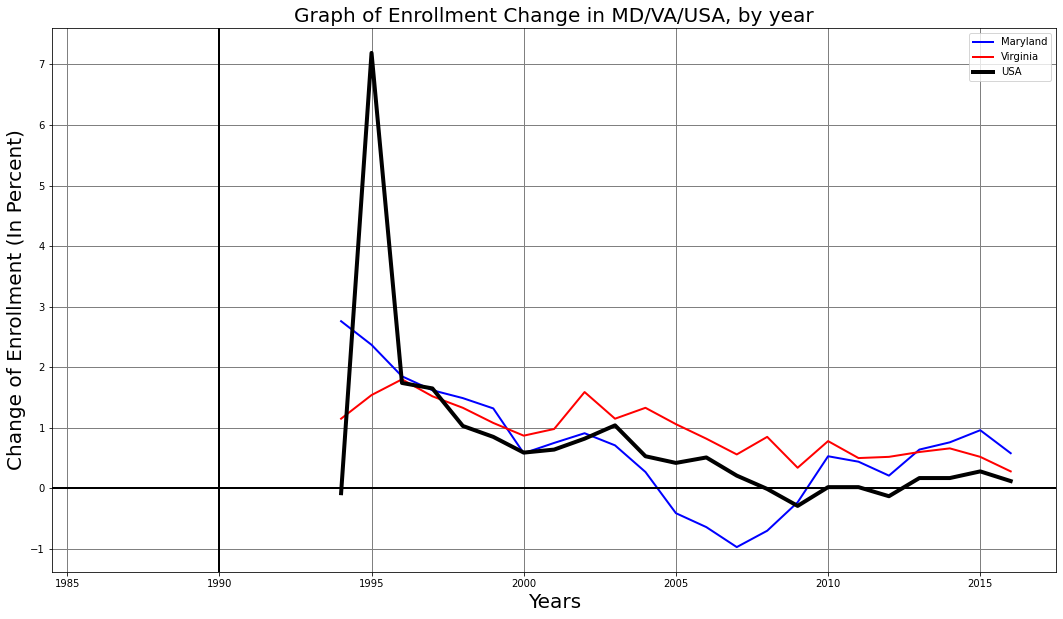

In [144]:
# Decreasing rate of expenditure over time
md_year = md_df['YEAR']
md_enroll = md_df['Enrollment Percent Change']

va_year = va_df['YEAR']
va_enroll = va_df['Enrollment Percent Change']

all_year = all_df['YEAR']
all_enroll = all_df['Enrollment Percent Change']

#Make the plots
fig, ax = plt.subplots(figsize = (18,10))

ax.plot(md_year, md_enroll, color = "blue", label = "Maryland", linewidth = 2)
ax.plot(va_year, va_enroll, color = "red", label = "Virginia", linewidth = 2)
ax.plot(all_year, all_enroll, color = "black", label = "USA", linewidth=4)

ax.grid(color='gray',which='major', linestyle='-', linewidth=1)

gf_font_size = 20

ax.set_title("Graph of Enrollment Change in MD/VA/USA, by year", color='black', size = gf_font_size)
ax.legend()
ax.axhline(y=0, color = "black",linewidth=2)
ax.axvline(x=1990, color = "black",linewidth=2)
ax.set_xlabel("Years", color='black', size = gf_font_size)
ax.set_ylabel("Change of Enrollment (In Percent)", color='black', size = gf_font_size)

**Analysis:** Interestingly, it looks like there are relatively similar trends in Maryland, Virginia, and the United States in terms of rate of enrollment by year.Except for 1994, where there was a huge spike, most of the other years are pretty normal. 

Let's graph total expenditure next....

In [145]:
#Add Percent Columns For Total Expenditure
add_pct_col(va_df,"TOTAL_EXPENDITURE",10, "Total Expenditure Percent Change")
add_pct_col(all_df,"TOTAL_EXPENDITURE",10, "Total Expenditure Percent Change")

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, 'Percent Change')

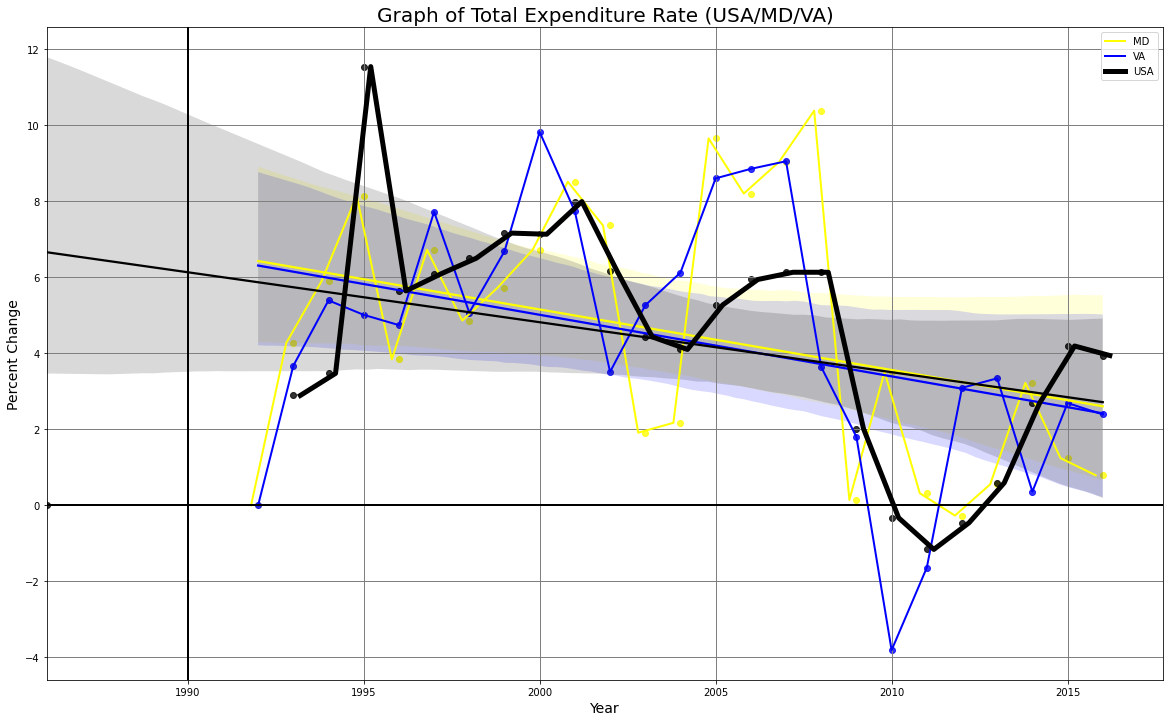

In [146]:
# Decreasing rate of expenditure over time
md_year = md_df['YEAR']
md_total_exp = md_df['Total Expenditure Percent Change']

va_year = va_df['YEAR']
va_total_exp = va_df['Total Expenditure Percent Change']

all_year = all_df['YEAR']
all_total_exp = all_df['Total Expenditure Percent Change']

fig, ax = plt.subplots(figsize = (20,12))

#Graph by bar, and check for regplot to see if the trend is upwards or downwards.
ax.plot(md_year-.2, md_total_exp, color = "yellow", linewidth = 2, label="MD")
sns.regplot(md_year,md_total_exp, color = "yellow")

ax.plot(va_year+0, va_total_exp, color = "blue", linewidth=2, label="VA")
sns.regplot(va_year,va_total_exp, color = "blue")

ax.plot(all_year+.2, all_total_exp, color = 'black', linewidth = 5, label = "USA")
sns.regplot(all_year,all_total_exp, color = "black")

ax.grid(color='gray',which='major', linestyle='-', linewidth=1)
ax.legend()
ax.axhline(y=0, color = "black",linewidth=2)
ax.axvline(x=1990, color = "black",linewidth=2)
ax.set_title("Graph of Total Expenditure Rate (USA/MD/VA)", color='black', size = 20)
ax.set_xlabel("Year", color='black', size = 14)
ax.set_ylabel("Percent Change", color='black', size = 14)

**Analysis:** It appears like Expenditure rates have been declining per year.It appears as if there is a similar spending pattern for maryland and virginia, as goes the country. We see some similar values here, and slightly declining trends for all three lines.   
Expenditure change is slowly but surely dropping, per year. There is less increase in moeny being spent on students per year, and this is somewhat more significant after 2008 through 2019.  


## G. Let's do the same thing for Expenditure Per Student (Total EXP/Enrollment)
We will run through the steps one more time to see if the expenditure PER STUDENT has changed and increased or decreased, over time. 

In [147]:
#Add Percent Columns For Total Expenditure Per Student
add_pct_col(va_df,"EXPENDITURE_PER_STUDENT",13, "Total Cost Per Student Percent Change")
add_pct_col(all_df,"EXPENDITURE_PER_STUDENT",13, "Total Cost Per Student Percent Change")
add_pct_col(md_df,"EXPENDITURE_PER_STUDENT",13, "Total Cost Per Student Percent Change")

Text(0, 0.5, 'Percent Change')

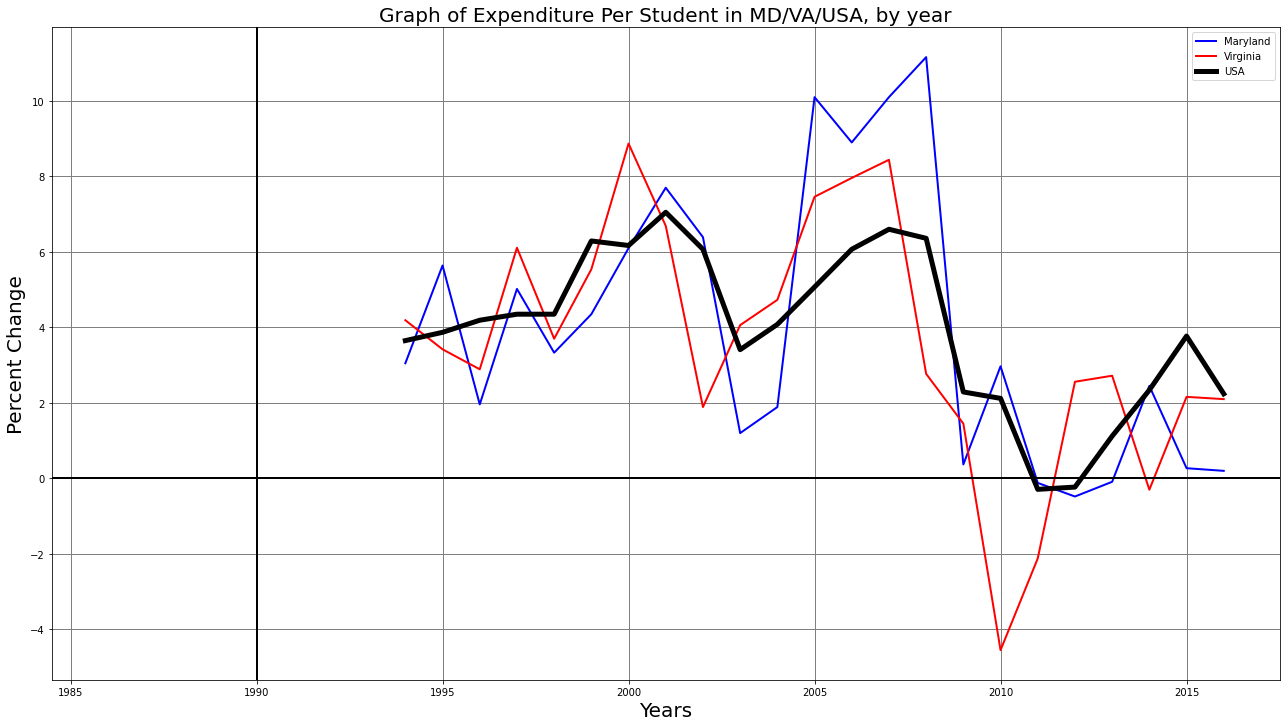

In [148]:
# Decreasing rate of expenditure over time
md_year = md_df['YEAR']
md_enroll = md_df['Total Cost Per Student Percent Change']

va_year = va_df['YEAR']
va_enroll = va_df['Total Cost Per Student Percent Change']

all_year = all_df['YEAR']
all_enroll = all_df['Total Cost Per Student Percent Change']

#Make the plots
fig, ax = plt.subplots(figsize = (22,12))

ax.plot(md_year, md_enroll, color = "blue", label = "Maryland", linewidth = 2)
ax.plot(va_year, va_enroll, color = "red", label = "Virginia", linewidth = 2)
ax.plot(all_year, all_enroll, color = "black", label = "USA", linewidth=5)

ax.grid(color='gray',which='major', linestyle='-', linewidth=1)

gf_font_size = 20

ax.set_title("Graph of Expenditure Per Student in MD/VA/USA, by year", color='black', size = gf_font_size)
ax.legend()
ax.axhline(y=0, color = "black",linewidth=2)
ax.axvline(x=1990, color = "black",linewidth=2)
ax.set_xlabel("Years", color='black', size = gf_font_size)
ax.set_ylabel("Percent Change", color='black', size = gf_font_size)

**Analysis:** Unfortunately, there is nothing particularly surprising here. Upon looking through the data of expenditures and enrollment, we can come to the conclusion that Maryland and Virginia run with the country. There has been a slowing of change in student funding recently, with the change approaching or even going negative after 2015, which is obviously disapponting for districts that need money. 

However, for the most part, the spending per school appears to have stayed above 1%. Though inflation averages about 3% per year, it appears as if overall school spending has been OK.

One last look at the basic descriptive statistics here:


 ## H. Comparing to Inflation
 In the last step, I want to think about how student expenditure changes compared to inflation. One of the issues with simply thinking about expenditure is that the dollar amounts are the same per year. In reality, they aren't. Inflation changes the way that money is valued at. 
   
 Just like a salary that stays at 10,000$ every year for ten years is really losing money, so are students 'losing' money if changes are not outpacing inflation. 
**Source: https://www.usinflationcalculator.com/inflation/historical-inflation-rates/**

In [149]:
inf_df_lists = pd.read_html('https://www.usinflationcalculator.com/inflation/historical-inflation-rates/', header = 0) #Set the header as 0 for both dataframes to save time

In [150]:
inf_df = inf_df_lists[0]

In [151]:
inf_df.head()

,Year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,Ave
0,1914,2.0,1.0,1.0,0.0,2.1,1.0,1.0,3.0,2.0,1.0,1.0,1.0,1.0
1,1915,1.0,1.0,0.0,2.0,2.0,2.0,1.0,-1.0,-1.0,1.0,1.0,2.0,1.0
2,1916,3.0,4.0,6.1,6.0,5.9,6.9,6.9,7.9,9.9,10.8,11.7,12.6,7.9
3,1917,12.5,15.4,14.3,18.9,19.6,20.4,18.5,19.3,19.8,19.5,17.4,18.1,17.4
4,1918,19.7,17.5,16.7,12.7,13.3,13.1,18.0,18.5,18.0,18.5,20.7,20.4,18.0


In [152]:
inf_year_df = inf_df[["Year", "Ave"]].sort_values(by="Year", ascending = True)

In [153]:
inf_year_df.set_index("Year")

,Ave
Year,
1914,1.0
1915,1.0
1916,7.9
1917,17.4
1918,18.0
...,...
2016,1.3
2017,2.1
2018,2.4


Text(0, 0.5, 'Change in Percent')

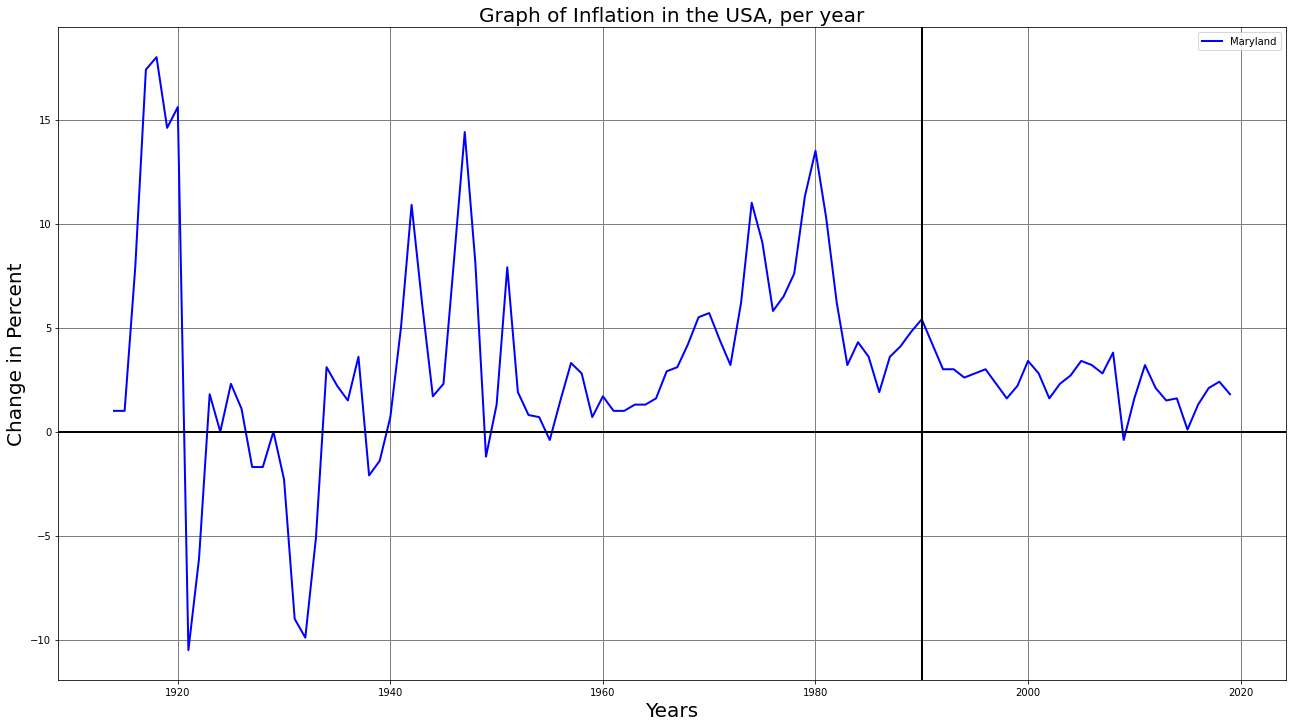

In [154]:
# Decreasing rate of expenditure over time
year = inf_year_df['Year']
inflation = inf_year_df['Ave']

#Make the plots
fig, ax = plt.subplots(figsize = (22,12))

ax.plot(year, inflation, color = "blue", label = "Maryland", linewidth = 2)

ax.grid(color='gray',which='major', linestyle='-', linewidth=1)
gf_font_size = 20

ax.set_title("Graph of Inflation in the USA, per year", color='black', size = gf_font_size)
ax.legend()
ax.axhline(y=0, color = "black",linewidth=2)
ax.axvline(x=1990, color = "black",linewidth=2)
ax.set_xlabel("Years", color='black', size = gf_font_size)
ax.set_ylabel("Change in Percent", color='black', size = gf_font_size)

**Analysis:** It looks like inflation past 2000 has been roughly between 0 and 5%. Since it is above 0, it would mean that, all things equal, a 0% rate of change in expenditure per student would actually be a negative percent of change, since schools and school districts would have less buying power. 

In [155]:
#Merge the two dataframes so that we can use them with inflation.
new_md_df = md_df.merge(inf_year_df, left_on='YEAR', right_on='Year')
new_md_df = new_md_df.sort_values(by="YEAR")

In [156]:
new_md_df.tail(20)

,PRIMARY_KEY,STATE,YEAR,Enrollment Percent Change,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,Total Expenditure Percent Change,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,EXPENDITURE_PER_STUDENT,Total Cost Per Student Percent Change,SUPPORT_SERVICES_EXPENDITURE,OTHER_EXPENDITURE,CAPITAL_OUTLAY_EXPENDITURE,GRADES_PK_G,GRADES_KG_G,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE,Year,Ave
7,1999_MARYLAND,MARYLAND,1999,1.32,841671.0,6850334.0,372016.0,2686695.0,3791623.0,5.72,6892276.0,3660046.0,8.188801,4.35,2096627.0,304175.0,608284.0,19285.0,56942.0,69077.0,62776.0,50632.0,527889.0,236400.0,846582.0,NaN,NaN,NaN,NaN,1999,2.2
8,2000_MARYLAND,MARYLAND,2000,0.58,846582.0,7419047.0,409021.0,2804218.0,4205808.0,6.72,7355698.0,3874590.0,8.688701,6.10,2189499.0,300044.0,760810.0,20031.0,56073.0,69279.0,64647.0,50962.0,530097.0,240843.0,852920.0,222.0,272.0,NaN,NaN,2000,3.4
9,2001_MARYLAND,MARYLAND,2001,0.75,852920.0,7864290.0,467001.0,2928704.0,4468585.0,8.51,7981362.0,4172982.0,9.357691,7.70,2366854.0,369293.0,813068.0,20314.0,56384.0,67448.0,66211.0,52671.0,531432.0,246807.0,860640.0,NaN,NaN,NaN,NaN,2001,2.8
10,2002_MARYLAND,MARYLAND,2002,0.91,860640.0,8430663.0,527311.0,3133775.0,4769577.0,7.36,8568446.0,4482809.0,9.955900,6.39,2469485.0,392195.0,941083.0,20569.0,56577.0,65824.0,67984.0,54764.0,530603.0,253506.0,866743.0,NaN,NaN,217.0,263.0,2002,1.6
11,2003_MARYLAND,MARYLAND,2003,0.71,866743.0,8700979.0,571108.0,3317403.0,4812468.0,1.91,8732518.0,4738579.0,10.075095,1.20,2630831.0,385935.0,674852.0,21391.0,55485.0,65119.0,68967.0,55897.0,526636.0,260526.0,869113.0,233.0,278.0,219.0,262.0,2003,2.3
12,2004_MARYLAND,MARYLAND,2004,0.27,869113.0,9123493.0,581542.0,3436703.0,5105248.0,2.17,8921938.0,4963083.0,10.265567,1.89,2673482.0,393663.0,581423.0,23380.0,54838.0,63776.0,69567.0,57432.0,519199.0,268144.0,865561.0,NaN,NaN,NaN,NaN,2004,2.7
13,2005_MARYLAND,MARYLAND,2005,-0.41,865561.0,9906219.0,670998.0,3729262.0,5505959.0,9.65,9782665.0,5154440.0,11.302109,10.10,2934277.0,407619.0,947970.0,24219.0,56858.0,62347.0,68400.0,58766.0,507494.0,271449.0,860020.0,238.0,278.0,220.0,261.0,2005,3.4
14,2006_MARYLAND,MARYLAND,2006,-0.64,860021.0,10697117.0,663284.0,4189334.0,5844499.0,8.20,10585292.0,5535192.0,12.308179,8.90,3217615.0,448422.0,1037525.0,25674.0,56133.0,61045.0,66332.0,60656.0,497258.0,272575.0,851640.0,NaN,NaN,NaN,NaN,2006,3.2
15,2007_MARYLAND,MARYLAND,2007,-0.97,851640.0,11674965.0,661677.0,4684827.0,6328461.0,9.03,11541225.0,6031042.0,13.551765,10.10,3503877.0,474728.0,1170502.0,27179.0,59455.0,60281.0,65088.0,61767.0,489845.0,269221.0,845700.0,240.0,286.0,225.0,265.0,2007,2.8
16,2008_MARYLAND,MARYLAND,2008,-0.70,845700.0,13098112.0,701595.0,5499326.0,6897191.0,10.38,12739693.0,6614339.0,15.064081,11.16,3878575.0,500507.0,1358068.0,26821.0,60530.0,59512.0,63639.0,60916.0,489122.0,267388.0,843861.0,NaN,NaN,NaN,NaN,2008,3.8


Text(0, 0.5, 'Change in Percent')

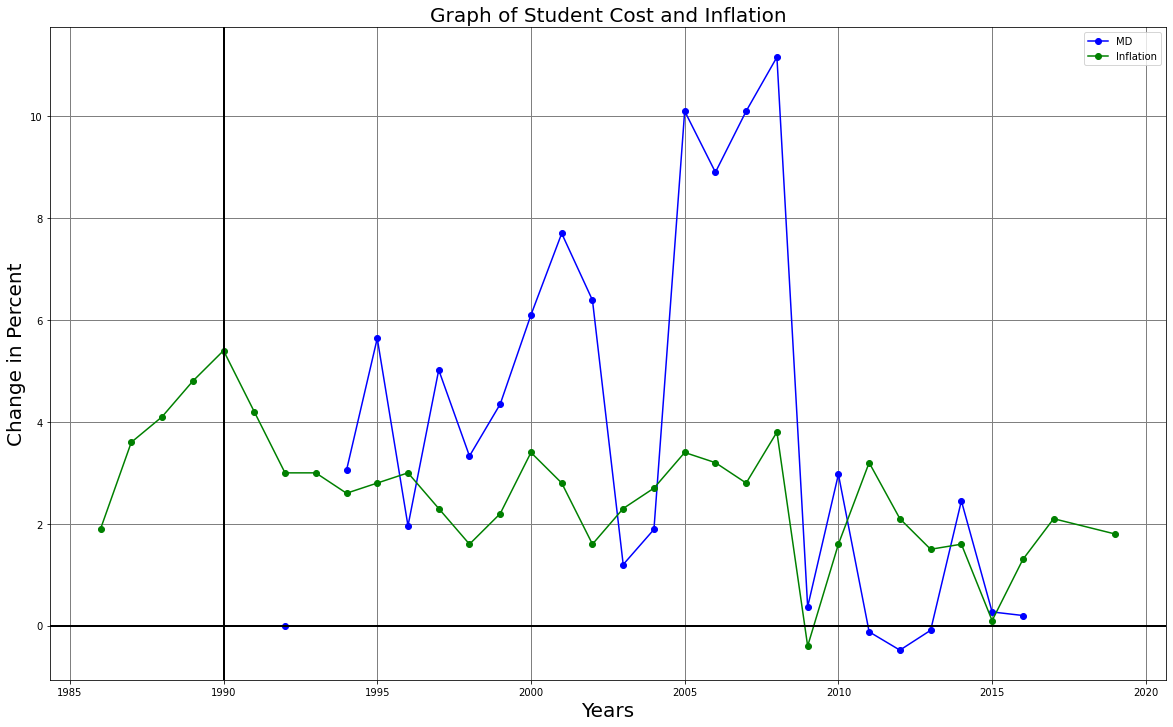

In [177]:
# Decreasing rate of expenditure over time
md_year = new_md_df['YEAR']
md_enroll = new_md_df['Total Cost Per Student Percent Change']
inf = new_md_df['Ave']

#Make the plots
fig, ax = plt.subplots(figsize = (20,12))

ax.plot(md_year, md_enroll, '-o', color = 'blue', label = "MD")
ax.plot(md_year, inf, '-o', color = 'green', label = "Inflation")

ax.grid(color='gray',which='major', linestyle='-', linewidth=1)

ax.set_title("Graph of Student Cost and Inflation", color='black', size = gf_font_size)
ax.legend()
ax.axhline(y=0, color = "black",linewidth=2)
ax.axvline(x=1990, color = "black",linewidth=2)
ax.set_xlabel("Years", color='black', size = 20)
ax.set_ylabel("Change in Percent", color='black', size = 20)

**Analysis:** At first, it appears as if Maryland total student spending was definitely outpacing expenditure per day. Unfortunately, after 2009, this trend was basically reversed, and subsequent years had similar values of inflation and increase in student expenditure, indicating that overall, Maryland education spending was stagnant and only keeping pace (or even falling short of, in the case of 2011-2013, *less* than inflation, meaning real spending per student was decreasing. 

Text(0, 0.5, 'Percent Change')

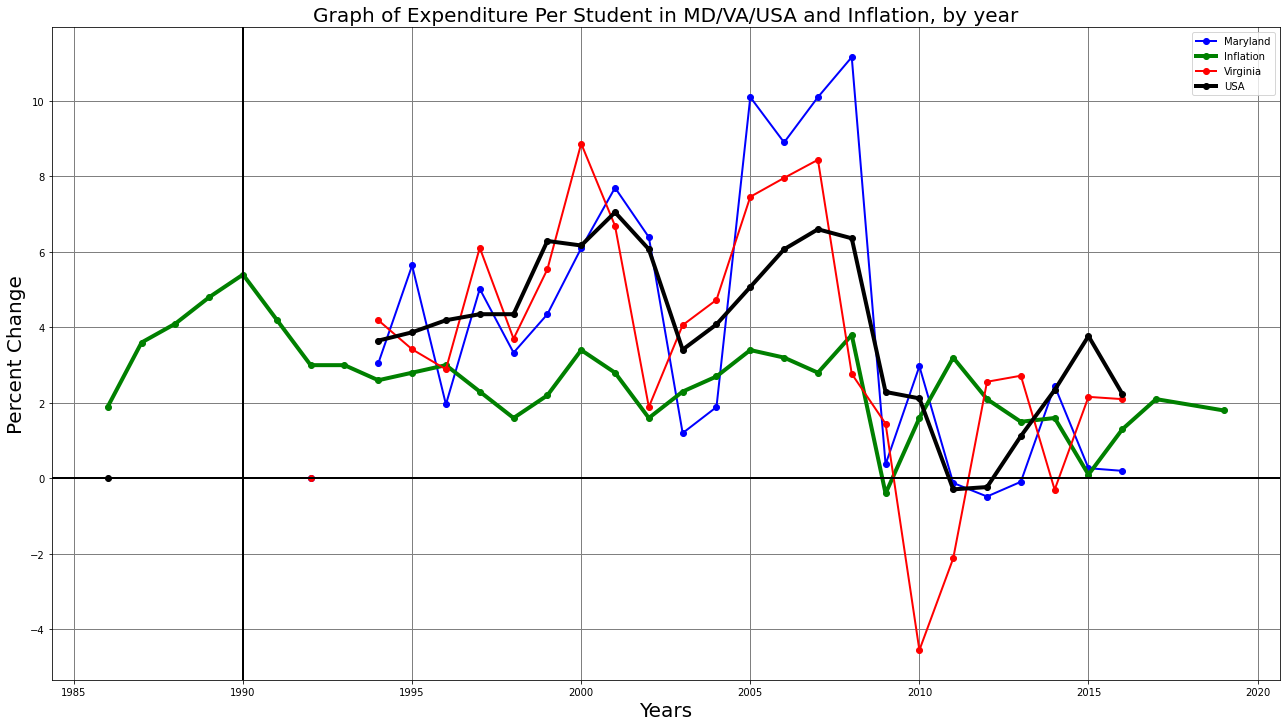

In [165]:
# Decreasing rate of expenditure over time
md_year = md_df['YEAR']
md_enroll = md_df['Total Cost Per Student Percent Change']

va_year = va_df['YEAR']
va_enroll = va_df['Total Cost Per Student Percent Change']

all_year = all_df['YEAR']
all_enroll = all_df['Total Cost Per Student Percent Change']

md_year = new_md_df['YEAR']
md_enroll = new_md_df['Total Cost Per Student Percent Change']

inf = new_md_df['Ave']

#Make the plots
fig, ax = plt.subplots(figsize = (22,12))

ax.plot(md_year, md_enroll, '-o', color = "blue",  label = "Maryland", linewidth = 2)
ax.plot(md_year, inf,  '-o', color = "green", label = "Inflation", linewidth = 4)
ax.plot(va_year, va_enroll,  '-o', color = "red", label = "Virginia", linewidth = 2)
ax.plot(all_year, all_enroll,  '-o', color = "black", label = "USA", linewidth=4)

ax.grid(color='gray',which='major', linestyle='-', linewidth=1)

gf_font_size = 20

ax.set_title("Graph of Expenditure Per Student in MD/VA/USA and Inflation, by year", color='black', size = gf_font_size)
ax.legend()
ax.axhline(y=0, color = "black",linewidth=2)
ax.axvline(x=1990, color = "black",linewidth=2)
ax.set_xlabel("Years", color='black', size = gf_font_size)
ax.set_ylabel("Percent Change", color='black', size = gf_font_size)

**Analysis:** So, for the most part, the rate of change of student spending outpaced inflation (the green line), until 2009. This could be due to the prolongued economic recession in 2008, with a protraction of spending at both national and state levels on education. It could also be due to other factors, or perhaps changes in the accounting of spending and inflation, which are out of the scope of this notebook. 

A more-frightening trend of the data is that of late, the inflation line is very similar to the increase in expendutre line past 2010. This would indicate that in reality, there is no additional, or perhaps even negative additional spending being spent on education. For example, in 2011, the inflation line was higher than the increase in expenditure for the US, as well as Maryland and Virginia. This trend was similar all the way through 2016, where the data ends. 

In [174]:
#For Conclusions
md_df['EXPENDITURE_PER_STUDENT'].describe()

count    24.000000
mean     11.523504
std       3.587522
min       6.515788
25%       8.103513
50%      10.783838
75%      15.464253
max      15.914757
Name: EXPENDITURE_PER_STUDENT, dtype: float64

## H. Conclusions:
- How much money is being spent on students currently?  
> In Maryland, Anywhere from  6500 to 15000 now. Values can be seen from the graphs above, but overall, the values have been steadily increasing. 

- What can be said about our funding of students? 
> Funding in many states has increased for most years. However, as we saw, the rate of expenditure per year has decreased over the years. Additionally, it appears to only barely outpacing inflation, and in recent years, has been even worse in terms of inflation.  
Maryland and Viriginia appear to be following the national average, for the most part, in terms of spending. There are 

- And maybe, what can be said of their peformance?  
> Unfortunately, there were issues and limitations with the student performance data in this dataset. Hopefully, a fuller dataset with performance data taken each year can yield a better look at performance over the years. 

- What might the future look like?
> The expected inflation rate in 2021 appears to be about 2.2%. It will be interesting to see where spending is for education this and next year, especially with covid requiring additional expenditures on school for ppe, etc. despite the coming economic squeeze. In the last recession (2008), we saw a marked downturn and eventually very similar spending to inflation rate on expenditure per student, and we may see this again. What this means for the education sector as a whole is that there likely will not be a lot of additional money for expanded staff hiring, etc. 

## Thoughts for future notebooks: 
- Bring in better datasets to compare student performance data with spending data. 
- Look further into the real rate of change per spending per student based on inflation trends- are we really spending more on students? It looked debatable from what we saw so far. 